# Graph embedding using [DeepWalk](https://arxiv.org/pdf/1403.6652.pdf) and[ node2vec](https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

from sklearn.decomposition import PCA

from graph_embedding_continuity import *

In [2]:
N = 20

N_TRAIN = 50
EMBEDDING_SIZE = 2
WALK_LENGTH = 10
WINDOW_SIZE = 2
N_NEG = 2
HIDDEN_SIZE = 16

USE_CUDA = False
USE_PCA_TO_PLOT = True

## Embedding under removal of an edge that disconnects the graph

In [3]:
chain = generate_chain(N)
cycle = generate_cycle(N)

# add some random weights on each edge,
# same weight for the edges common to
# the chain and the cycle.
shared_weights = np.random.rand(N-1)

for v, _ in chain.edges():
    chain[v][v+1]['weight'] = shared_weights[v]
    cycle[v][v+1]['weight'] = shared_weights[v]

# put a tiny weight on the closing edge of the cycle.
cycle[N-1][0]['weight'] = 0.01*np.random.rand()

# save layout
pos = nx.shell_layout(cycle)

### DeepWalk

In [4]:
emb_words_dw, emb_contexts_dw = deepwalk_embedding_time_reg([cycle, chain],
                                                            k=EMBEDDING_SIZE,
                                                            n_train=N_TRAIN,
                                                            walk_length=WALK_LENGTH,
                                                            window_size=WINDOW_SIZE,
                                                            n_neg=N_NEG,
                                                            hidden_size = HIDDEN_SIZE,
                                                            use_cuda=USE_CUDA,
                                                           )

emb_word_cycle_dw, emb_word_chain_dw = emb_words_dw
emb_context_cycle_dw, emb_context_chain_dw = emb_contexts_dw

Epoch : 1/50: 100%|███████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.9it/s, loss=51.2]
Epoch : 10/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 42.7it/s, loss=50.9]
Epoch : 20/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 43.3it/s, loss=48.5]
Epoch : 30/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.9it/s, loss=42.9]
Epoch : 40/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 44.0it/s, loss=41.6]
Epoch : 50/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 43.1it/s, loss=36.1]
Epoch : 1/50: 100%|███████████████████████████████████| 20.0/20.0 [00:00<00:00, 43.5it/s, loss=39.6]
Epoch : 10/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 42.7it/s, loss=38.8]
Epoch : 20/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 41.5it/s, loss=38.4]
Epoch : 30/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.3it/s, l

### node2vec -  depth-first incentive

In [5]:
p = 1.0
q = 1/3

emb_words_dfs, emb_contexts_dfs = node2vec_embedding_time_reg([cycle, chain],
                                                              p=p,
                                                              q=q,
                                                              k=EMBEDDING_SIZE,
                                                              n_train=N_TRAIN,
                                                              walk_length=WALK_LENGTH,
                                                              window_size=WINDOW_SIZE,
                                                              n_neg=N_NEG,
                                                              hidden_size = HIDDEN_SIZE,
                                                              use_cuda=USE_CUDA,
                                                             )

emb_word_cycle_dfs, emb_word_chain_dfs = emb_words_dfs
emb_context_cycle_dfs, emb_context_chain_dfs = emb_contexts_dfs

Epoch : 1/50: 100%|███████████████████████████████████| 20.0/20.0 [00:00<00:00, 42.2it/s, loss=51.2]
Epoch : 10/50: 100%|████████████████████████████████████| 20.0/20.0 [00:00<00:00, 40.7it/s, loss=51]
Epoch : 20/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 38.5it/s, loss=50.3]
Epoch : 30/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 42.8it/s, loss=42.9]
Epoch : 40/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 42.3it/s, loss=40.6]
Epoch : 50/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 43.7it/s, loss=40.4]
Epoch : 1/50: 100%|███████████████████████████████████| 20.0/20.0 [00:00<00:00, 43.1it/s, loss=39.9]
Epoch : 10/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 42.9it/s, loss=39.1]
Epoch : 20/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 39.9it/s, loss=39.6]
Epoch : 30/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 41.7it/s, l

### node2vec - breadth-first incentive

In [6]:
p = 1.0
q = 3.0

emb_words_bfs, emb_contexts_bfs = node2vec_embedding_time_reg([cycle, chain],
                                                              p=p,
                                                              q=q,
                                                              k=EMBEDDING_SIZE,
                                                              n_train=N_TRAIN,
                                                              walk_length=WALK_LENGTH,
                                                              window_size=WINDOW_SIZE,
                                                              n_neg=N_NEG,
                                                              hidden_size = HIDDEN_SIZE,
                                                              use_cuda=USE_CUDA,
                                                             )

emb_word_cycle_bfs, emb_word_chain_bfs = emb_words_bfs
emb_context_cycle_bfs, emb_context_chain_bfs = emb_contexts_bfs

Epoch : 1/50: 100%|███████████████████████████████████| 20.0/20.0 [00:00<00:00, 42.6it/s, loss=51.2]
Epoch : 10/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 43.5it/s, loss=50.8]
Epoch : 20/50: 100%|████████████████████████████████████| 20.0/20.0 [00:00<00:00, 42.5it/s, loss=46]
Epoch : 30/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 44.8it/s, loss=40.7]
Epoch : 40/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 42.7it/s, loss=39.2]
Epoch : 50/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 43.1it/s, loss=38.9]
Epoch : 1/50: 100%|███████████████████████████████████| 20.0/20.0 [00:00<00:00, 43.3it/s, loss=38.5]
Epoch : 10/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 42.7it/s, loss=38.6]
Epoch : 20/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 37.3it/s, loss=38.2]
Epoch : 30/50: 100%|██████████████████████████████████| 20.0/20.0 [00:00<00:00, 38.9it/s, l

## Compare

/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


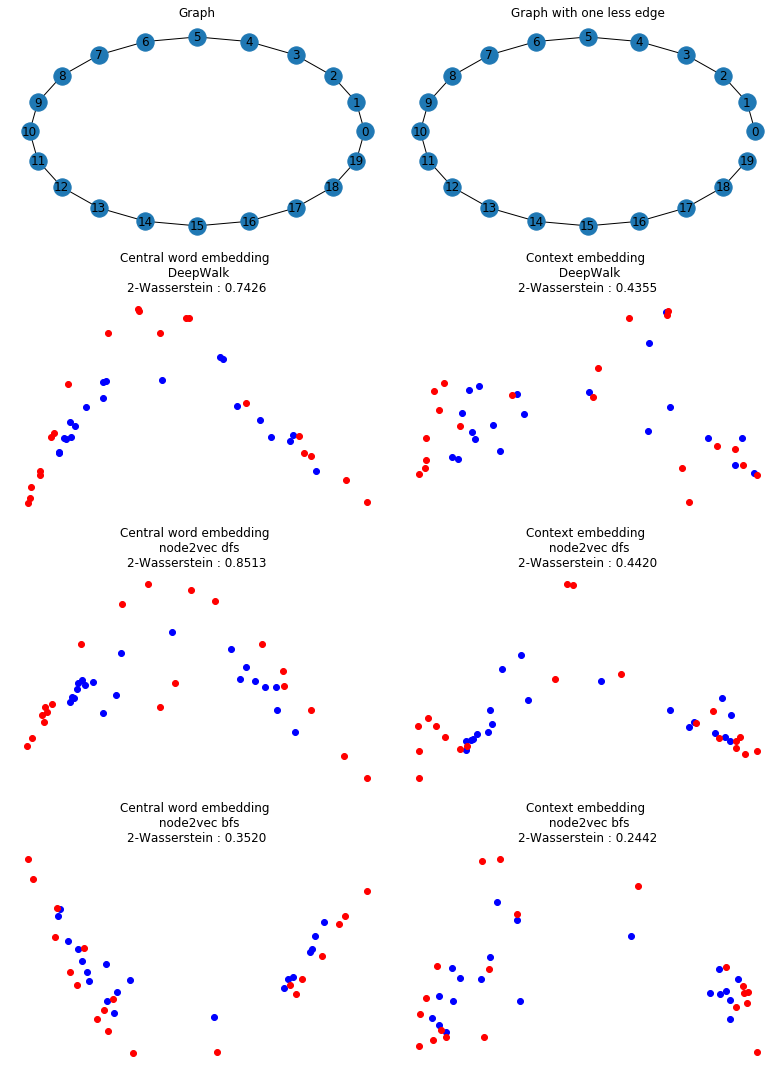

In [7]:
wass_word_dw = wasserstein_metric(emb_word_cycle_dw, emb_word_chain_dw)
wass_context_dw = wasserstein_metric(emb_context_cycle_dw, emb_context_chain_dw)
wass_word_dfs = wasserstein_metric(emb_word_cycle_dfs, emb_word_chain_dfs)
wass_context_dfs = wasserstein_metric(emb_context_cycle_dfs, emb_context_chain_dfs)
wass_word_bfs = wasserstein_metric(emb_word_cycle_bfs, emb_word_chain_bfs)
wass_context_bfs = wasserstein_metric(emb_context_cycle_bfs, emb_context_chain_bfs)

if USE_PCA_TO_PLOT:
    # extract 2 principal components to plot
    pca = PCA(n_components=2)
    emb_word_cycle_dw = pca.fit_transform(emb_word_cycle_dw)
    emb_context_cycle_dw = pca.fit_transform(emb_context_cycle_dw)
    emb_word_chain_dw = pca.fit_transform(emb_word_chain_dw)
    emb_context_chain_dw = pca.fit_transform(emb_context_chain_dw)
    
    emb_word_cycle_dfs = pca.fit_transform(emb_word_cycle_dfs)
    emb_context_cycle_dfs = pca.fit_transform(emb_context_cycle_dfs)
    emb_word_chain_dfs = pca.fit_transform(emb_word_chain_dfs)
    emb_context_chain_dfs = pca.fit_transform(emb_context_chain_dfs)
    
    emb_word_cycle_bfs = pca.fit_transform(emb_word_cycle_bfs)
    emb_context_cycle_bfs = pca.fit_transform(emb_context_cycle_bfs)
    emb_word_chain_bfs = pca.fit_transform(emb_word_chain_bfs)
    emb_context_chain_bfs = pca.fit_transform(emb_context_chain_bfs)

# plot the graph
fig, axes = plt.subplots(figsize=(11,15), nrows=4, ncols=2)

ax = axes[0, 0]
nx.draw_networkx(cycle, pos = pos, ax=ax)
ax.set_title('Graph')
ax.axis('off')

ax = axes[0, 1]
nx.draw_networkx(chain, pos = pos, ax=ax)
ax.set_title('Graph with one less edge')
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb_word_cycle_dw[:, 0], emb_word_cycle_dw[:, 1], label='cycle', color='b')
ax.scatter(emb_word_chain_dw[:, 0], emb_word_chain_dw[:, 1], label='chain', color='r')
ax.set_title('Central word embedding \n DeepWalk\n2-Wasserstein : {:.4f}'.format(wass_word_dw))
# ax.legend(loc='upper right')
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb_context_cycle_dw[:, 0], emb_context_cycle_dw[:, 1], label='cycle', color='b')
ax.scatter(emb_context_chain_dw[:, 0], emb_context_chain_dw[:, 1], label='chain', color='r')
ax.set_title('Context embedding \n DeepWalk\n2-Wasserstein : {:.4f}'.format(wass_context_dw))
# ax.legend(loc='upper right')
ax.axis('off')

ax = axes[2, 0]
ax.scatter(emb_word_cycle_dfs[:, 0], emb_word_cycle_dfs[:, 1], label='cycle', color='b')
ax.scatter(emb_word_chain_dfs[:, 0], emb_word_chain_dfs[:, 1], label='chain', color='r')
ax.set_title('Central word embedding \n node2vec dfs\n2-Wasserstein : {:.4f}'.format(wass_word_dfs))
# ax.legend(loc='upper right')
ax.axis('off')

ax = axes[2, 1]
ax.scatter(emb_context_cycle_dfs[:, 0], emb_context_cycle_dfs[:, 1], label='cycle', color='b')
ax.scatter(emb_context_chain_dfs[:, 0], emb_context_chain_dfs[:, 1], label='chain', color='r')
ax.set_title('Context embedding \n node2vec dfs\n2-Wasserstein : {:.4f}'.format(wass_context_dfs))
# ax.legend(loc='upper right')
ax.axis('off')

ax = axes[3, 0]
ax.scatter(emb_word_cycle_bfs[:, 0], emb_word_cycle_bfs[:, 1], label='cycle', color='b')
ax.scatter(emb_word_chain_bfs[:, 0], emb_word_chain_bfs[:, 1], label='chain', color='r')
ax.set_title('Central word embedding \n node2vec bfs\n2-Wasserstein : {:.4f}'.format(wass_word_bfs))
# ax.legend(loc='upper right')
ax.axis('off')

ax = axes[3, 1]
ax.scatter(emb_context_cycle_bfs[:, 0], emb_context_cycle_bfs[:, 1], label='cycle', color='b')
ax.scatter(emb_context_chain_bfs[:, 0], emb_context_chain_bfs[:, 1], label='chain', color='r')
ax.set_title('Context embedding \n node2vec bfs\n2-Wasserstein : {:.4f}'.format(wass_context_bfs))
# ax.legend(loc='upper right')
ax.axis('off')
             
plt.tight_layout()
plt.show()
             
fig.savefig('deepwalk_chain_cycle.eps')